# Gemini NIRI reduction using DRAGONS Python API
***
## Public archival data from niriimg_tutorial - GN-2015B-Q-31 (SN2014J)
#### adapted from https://niriimg-drtutorial.readthedocs.io/en/release-2.1.x/04_extended_api.html
#### don't forget to `conda install -n dragons nb_conda_kernels ipykernel` to run this notebook on the DRAGONS env 
***

**Importing Python Libraries** (you'll probably have to install the `wget` and `ipympl` libraries)

In [4]:
from __future__ import print_function

import glob
import wget

from gempy.adlibrary import dataselect
from recipe_system import cal_service
from recipe_system.reduction.coreReduce import Reduce
from gempy.utils import logutils

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.colors import PowerNorm

from collections import namedtuple

#%matplotlib widget
%matplotlib inline

2020-10-12 16:24:16 WARNING  - AstropyDeprecationWarning: astropy.extern.six will be removed in 4.0, use the six module directly if it is still needed


**Downloading the data** (direct link to .tar file hosted at Gemini - 48 Megabytes)

In [1]:
# uncomment the line and run the cell
#
#wget.download("http://www.gemini.edu/sciops/data/software/datapkgs/niriimg_tutorial_datapkg-v1.tar")

**Downloading the data** (individual files - direct link to the Gemini Archive - 221 Megabytes)

In [2]:
# uncomment the lines and run the cell
#
# Science 
#
#wget.download("http://archive.gemini.edu/file/N20160102S0270.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0271.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0272.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0273.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0274.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0275.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0276.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0277.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0278.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0279.fits")

# Science darks
#
#wget.download("http://archive.gemini.edu/file/N20160102S0423.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0424.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0425.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0426.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0427.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0428.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0429.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0430.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0431.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0432.fits")

# Flats 
#
#wget.download("http://archive.gemini.edu/file/N20160102S0363.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0364.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0365.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0366.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0367.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0368.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0369.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0370.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0371.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0372.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0373.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0374.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0375.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0376.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0377.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0378.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0379.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0380.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0381.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0382.fits")

# Short darks
#
#wget.download("http://archive.gemini.edu/file/N20160103S0463.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0464.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0465.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0466.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0467.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0468.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0469.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0470.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0471.fits")
#wget.download("http://archive.gemini.edu/file/N20160103S0472.fits")

# Standard star
#
#wget.download("http://archive.gemini.edu/file/N20160102S0295.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0296.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0297.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0298.fits")
#wget.download("http://archive.gemini.edu/file/N20160102S0299.fits")

**Create and move data to raw/ directory** (uncomment first)

In [7]:
#!mkdir raw/
#!mv S2017*.fits raw/

In [8]:
# Check header of one raw science image
#
tmp = fits.open("raw/N20160102S0270.fits")
tmp[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
INSTRUME= 'NIRI    '           / Instrument used to acquire data.               
OBJECT  = 'SN2014J '           / Object Name                                    
OBSTYPE = 'OBJECT  '           / Observation type                               
OBSCLASS= 'science '           / Observe class                                  
GEMPRGID= 'GN-2015B-Q-31'      / Gemini Science Program ID                      
OBSID   = 'GN-2015B-Q-31-118'  / Observation ID / Data label                    
DATALAB = 'GN-2015B-Q-31-118

**Setting up the DRAGONS logger**

In [9]:
logutils.config(file_name='niri_data_reduction.log')

**Setting up the Calibration Service**

First, check that you have already a `rsys.cfg` file inside the `~/.geminidr/`. It should contain:

```[calibs]
standalone = True
database_dir = /path_to_this_folder/```

In [10]:
caldb = cal_service.CalibrationService()
caldb.config()
caldb.init()

cal_service.set_calservice()

CalibrationService is configured as standalone.
The configured local database will be used.


**Create a list of all the FITS files in the directory**

In [13]:
all_files = glob.glob('raw/N2016*[0-9].fits')
all_files.sort()
#all_files

**List of darks, flats, standard star, and science frames**

In [14]:
darks1s = dataselect.select_data(
    all_files, ['DARK'], [],
    dataselect.expr_parser('exposure_time==1'))

darks20s = dataselect.select_data(
    all_files, ['DARK'], [],
    dataselect.expr_parser('exposure_time==20'))

flats = dataselect.select_data(all_files, ['FLAT'])

stdstar = dataselect.select_data(
    all_files, [], [],
    dataselect.expr_parser('object=="FS 17"'))

target = dataselect.select_data(
    all_files, ['IMAGE'], ['FLAT'],
    dataselect.expr_parser('object!="FS 17"'))

**Create Master Dark and add to the calibration database**

In [19]:
reduce_darks = Reduce()
reduce_darks.files.extend(darks20s)
reduce_darks.runr()

caldb.add_cal(reduce_darks.output_filenames[0])

All submitted files appear valid:
raw/N20160102S0423.fits ... raw/N20160102S0432.fits, 10 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Upd

**Create Bad Pixel Mask**

In [20]:
reduce_bpm = Reduce()
reduce_bpm.files.extend(flats)
reduce_bpm.files.extend(darks1s)
reduce_bpm.recipename = 'makeProcessedBPM'
reduce_bpm.runr()

bpm = reduce_bpm.output_filenames[0]

All submitted files appear valid:
raw/N20160102S0363.fits ... raw/N20160103S0472.fits, 30 files submitted.
RECIPE: makeProcessedBPM
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
    

   Combining images.
   
   .
   PRIMITIVE: makeLampFlat
   -----------------------
      PRIMITIVE: selectFromInputs
      ---------------------------
      .
      PRIMITIVE: selectFromInputs
      ---------------------------
      .
      PRIMITIVE: showInputs
      ---------------------
      Inputs for lampOn
        N20160102S0373_ADUToElectrons.fits
        N20160102S0374_ADUToElectrons.fits
        N20160102S0375_ADUToElectrons.fits
        N20160102S0376_ADUToElectrons.fits
        N20160102S0377_ADUToElectrons.fits
        N20160102S0378_ADUToElectrons.fits
        N20160102S0379_ADUToElectrons.fits
        N20160102S0380_ADUToElectrons.fits
        N20160102S0381_ADUToElectrons.fits
        N20160102S0382_ADUToElectrons.fits
      .
      PRIMITIVE: showInputs
      ---------------------
      Inputs for lampOff
        N20160102S0363_ADUToElectrons.fits
        N20160102S0364_ADUToElectrons.fits
        N20160102S0365_ADUToElectrons.fits
        N20160102S0366_ADUToElectron

**Create Master Flat Field and add to the calibration database**

In [21]:
reduce_flats = Reduce()
reduce_flats.files.extend(flats)
reduce_flats.uparms = [('addDQ:user_bpm', bpm)]
reduce_flats.runr()

caldb.add_cal(reduce_flats.output_filenames[0])

All submitted files appear valid:
raw/N20160102S0363.fits ... raw/N20160102S0382.fits, 20 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Upd

     gain for EXTVER 1 = 12.3
   .
   PRIMITIVE: addVAR
   -----------------
   Adding the Poisson noise component of the variance
   .
   PRIMITIVE: makeLampFlat
   -----------------------
      PRIMITIVE: selectFromInputs
      ---------------------------
      .
      PRIMITIVE: selectFromInputs
      ---------------------------
      .
      PRIMITIVE: showInputs
      ---------------------
      Inputs for lampOn
        N20160102S0373_varAdded.fits
        N20160102S0374_varAdded.fits
        N20160102S0375_varAdded.fits
        N20160102S0376_varAdded.fits
        N20160102S0377_varAdded.fits
        N20160102S0378_varAdded.fits
        N20160102S0379_varAdded.fits
        N20160102S0380_varAdded.fits
        N20160102S0381_varAdded.fits
        N20160102S0382_varAdded.fits
      .
      PRIMITIVE: showInputs
      ---------------------
      Inputs for lampOff
        N20160102S0363_varAdded.fits
        N20160102S0364_varAdded.fits
        N20160102S0365_varAdded.fits
        

**Reduce Standard Star**

In [22]:
reduce_std = Reduce()
reduce_std.files.extend(stdstar)
reduce_std.uparms = [('addDQ:user_bpm', bpm)]
reduce_std.uparms.append(('darkCorrect:do_dark', False))
reduce_std.runr()

All submitted files appear valid:
raw/N20160102S0295.fits ... raw/N20160102S0299.fits, 5 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         .
         PRIMITIVE: standardizeInstrumentHeaders
         ---------------------------------------
         Updating keywords that are specific to NIRI
         Updating keywords that are s

   Found 14 sources in N20160102S0297_skySubtracted.fits:1
   Found 17 sources in N20160102S0298_skySubtracted.fits:1
   Found 14 sources in N20160102S0299_skySubtracted.fits:1
   .
   PRIMITIVE: transferAttribute
   ----------------------------
   Transferring attribute OBJMASK from stream skysub
   .
   PRIMITIVE: clearStream
   ----------------------
   .
   PRIMITIVE: associateSky
   -----------------------
   The sky frames associated with N20160102S0296_skyAssociated.fits are:
     N20160102S0297_skyAssociated.fits
     N20160102S0298_skyAssociated.fits
     N20160102S0299_skyAssociated.fits
   The sky frames associated with N20160102S0297_skyAssociated.fits are:
     N20160102S0296_skyAssociated.fits
     N20160102S0298_skyAssociated.fits
     N20160102S0299_skyAssociated.fits
   The sky frames associated with N20160102S0298_skyAssociated.fits are:
     N20160102S0296_skyAssociated.fits
     N20160102S0297_skyAssociated.fits
     N20160102S0299_skyAssociated.fits
   The sky fram

**Reduce Science Images**

In [23]:
reduce_target = Reduce()
reduce_target.files.extend(target)
reduce_target.uparms = [('addDQ:user_bpm', bpm)]
reduce_target.uparms.append(('skyCorrect:scale_sky', False))
reduce_target.runr()

All submitted files appear valid:
raw/N20160102S0270.fits ... raw/N20160102S0279.fits, 10 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Upd

         LOCAL CALIBRATION SEARCH:
         Cached calibration calibrations/processed_flat/N20160102S0373_flat.fits matched.
         LOCAL CALIBRATION SEARCH:
         Cached calibration calibrations/processed_flat/N20160102S0373_flat.fits matched.
         LOCAL CALIBRATION SEARCH:
         Cached calibration calibrations/processed_flat/N20160102S0373_flat.fits matched.
         LOCAL CALIBRATION SEARCH:
         Cached calibration calibrations/processed_flat/N20160102S0373_flat.fits matched.
         LOCAL CALIBRATION SEARCH:
         Cached calibration calibrations/processed_flat/N20160102S0373_flat.fits matched.
         LOCAL CALIBRATION SEARCH:
         Cached calibration calibrations/processed_flat/N20160102S0373_flat.fits matched.
         LOCAL CALIBRATION SEARCH:
         Cached calibration calibrations/processed_flat/N20160102S0373_flat.fits matched.
         .
      .
   .
   PRIMITIVE: separateSky
   ----------------------
   Science frames:
     N20160102S0271_flatCorrec

         N20160102S0275_objectMaskAdded.fits          1.000
         N20160102S0276_objectMaskAdded.fits          1.011
         N20160102S0277_objectMaskAdded.fits          1.021
         N20160102S0278_objectMaskAdded.fits          1.031
         N20160102S0279_objectMaskAdded.fits          1.031
         
         .
      .
   This sky will also be used for N20160102S0272_skyAssociated.fits
   This sky will also be used for N20160102S0273_skyAssociated.fits
   This sky will also be used for N20160102S0274_skyAssociated.fits
      PRIMITIVE: subtractSky
      ----------------------
      Subtracting the image (N20160102S0271_sky.fits) from the science AstroData object N20160102S0271_skyAssociated.fits
      .
      PRIMITIVE: subtractSky
      ----------------------
      Subtracting the image (N20160102S0271_sky.fits) from the science AstroData object N20160102S0272_skyAssociated.fits
      .
      PRIMITIVE: subtractSky
      ----------------------
      Subtracting the image (N201

**Display the Stacked Image**

In [24]:
image_file = "N20160102S0271_stack.fits"
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: N20160102S0271_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     198   ()      
  1  SCI           1 ImageHDU        45   (1075, 1076)   float32   
  2  VAR           1 ImageHDU        45   (1075, 1076)   float32   
  3  DQ            1 ImageHDU        47   (1075, 1076)   int16 (rescales to uint16)   


In [25]:
image_data = fits.getdata(image_file, ext=1)
print(image_data.shape)

(1076, 1075)


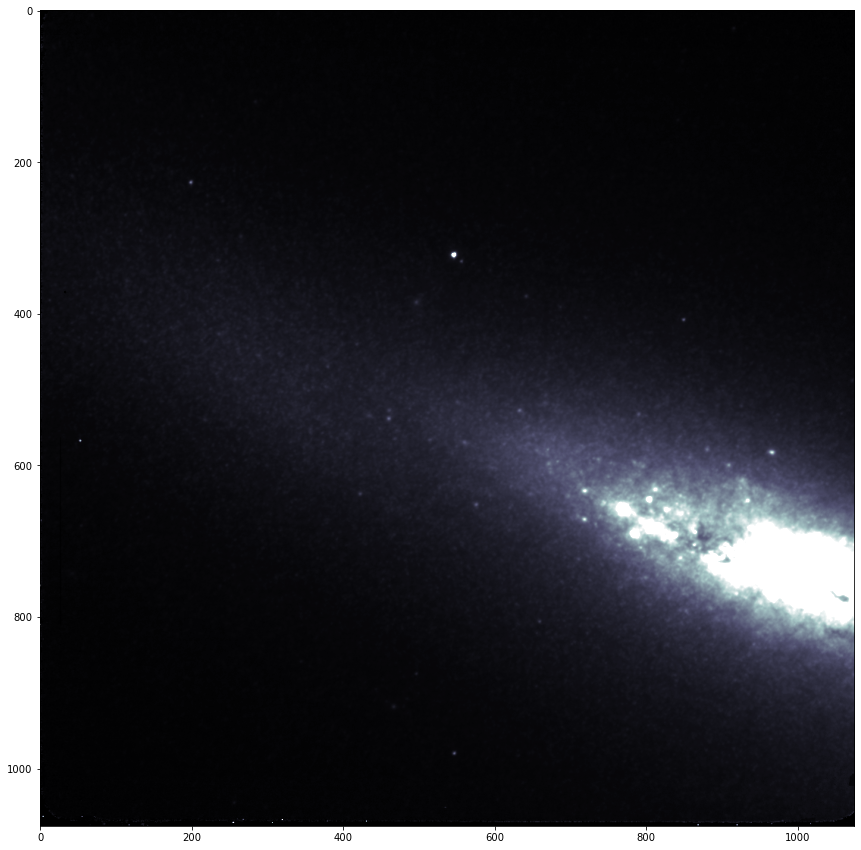

In [36]:
plt.figure(figsize = (15,15))
plt.imshow(image_data,cmap='bone',norm=Normalize(vmin=1, vmax=50000))
#plt.xlim(900,2500)
#plt.ylim(1600,600)
plt.show()

**Optional: remove raw data (uncomment lines before running)**

In [1]:
#!rm -rf raw/